In [23]:
import torch
from torch import distributions as dist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [60]:
mu_1 = np.array([[0.22], [0.45]])
mu_2 = np.array([[0.5], [0.5]])
mu = np.array([mu_1, mu_2])

sigma_1 = np.array([[0.011, -0.01], [-0.01, 0.018]])
sigma_2 = np.array([[0.018, 0.01], [0.01, 0.011]])
sigma = np.array([sigma_1, sigma_2])

mixture_probs = np.array([[0.4], [0.6]])

In [62]:
def plot_gaussian_mixture(Mu, Sigma, weights=None, x=None, y=None):
    if x == None:
        x = np.arange(0, 1, 0.01)
    if y == None:
        y = np.arange(0, 1, 0.01)

    if len(Mu) == len(Sigma) == len(weights):
        pass
    else:
        print("Error: Mu, Sigma and weights must have the same dimension")
        return

    X, Y = np.meshgrid(x, y)
    Pos = np.dstack((X, Y))
    Z = 0

    for i in range(len(Mu)):
        Z = Z + weights[i] * multivariate_normal(Mu[i].ravel(), Sigma[i]).pdf(Pos)

    fig = plt.figure(figsize=(6, 4))

    plt.contourf(X, Y, Z, levels=15)
    plt.colorbar()
    plt.xlabel(xlabel='X')
    plt.ylabel(ylabel='Y')
    plt.title('Mixture of Gaussians')
    plt.show()

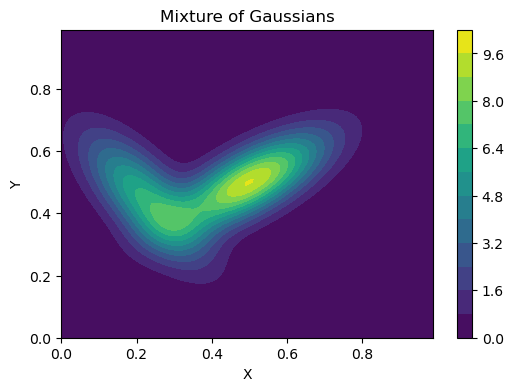

In [63]:
plot_gaussian_mixture(mu, sigma, weights=mixture_probs)